<h1><center>Practice of Large Scale Machine Learning - TP0 Titanic<center></h1>
<h2><center>ATHENS 2018<center></h2>

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paristech.fr
#### nidham.gazagnadou@telecom-paristech.fr

In [1]:
import numpy as np
import pandas as pd

# The dataset

<font color="red">**Question:**
    <br>
    Load the csv file '../data/titanic_train.csv' into a dataframe.
</font>

In [2]:
df = pd.read_csv('titanic_train.csv')

<font color="red">**Question:**
    <br>
    Inspect the data, and show the first rows using the 'df.head()' method.
</font>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color="red">**Question:**
    <br>
    Use the '.describe()' method in order to answer the following questions:
    <br>
- What is the average age of the passengers?
    <br>
- How old is the oldest passenger?
    <br>
- What percentage of survivors among the passengers?
</font>

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. The average age of the passengers is : 29.7
2. The oldest passenger is 80 years old
3. There is 38.4% passengers survived.

<font color="red">**Question:**
    <br>
    Compute the number of men and the number of survivors among the men using pandas' method "df.sum"
</font>

In [5]:
(df['Sex']=='male').sum()

577

In [6]:
df[df['Sex']=='male']['Survived'].sum()

109

<font color="red">**Question:**
    <br>
    Plot the histogram of ages and of classes. One can use the method "df.hist"
</font>

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

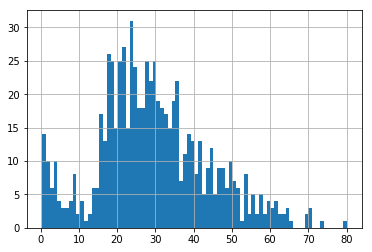

In [8]:
nb_bins = 80 # Fill here for the age histogram
df['Age'].hist(bins=nb_bins)

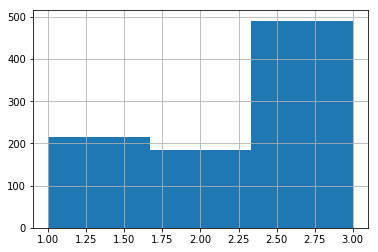

In [9]:
nb_bins = 3 # Fill here for the class histogram
df['Pclass'].hist(bins=nb_bins)

# Missing data preprocessing

<font color="red">**Question:**
    <br>
    Estimate the number of missing data per column using the "df.count" method.
</font>

In [10]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<font color="red">**Question:**
    <br>
    Remove columns that are non-informative or that contain to many missing values using the "df.drop" method. Do not forget to set the parameter "inplace" to "True".
</font>

In [11]:
print(df.columns.values)
df.drop(columns=[ 'Cabin','Name','PassengerId','Ticket' ], inplace=True ) # Fill here
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


<font color="red">**Question:**
    <br>
    Using the "fillna()" method, create a new dataframe where NaN are replaced by the median of the corresponding column.
</font>

In [12]:
df=df.fillna(df.median())

<font color="red">**Question:**
    <br>
    Verify that there are missing data anymore using '.count()'. If there are still some, delete the corresponding lines with '.dropna()'.
</font>

In [13]:
df.count()
df=df.dropna()
df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

## Categorical variables encoding

<font color="red">**Question:**
    <br>
    Verify that 'Sex' and 'Embarked' are the only categorical variables. One could for instance make use of the "df.types" method.
</font>

In [14]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

We notice that the types like 'int' or 'float' are continuous. So only 'Sex' and 'Embarked' are the type of 'object' and they are the only categorical variables.

<font color="red">**Question:**
    <br>
    With the help of the Pandas' function "pd.get_dummies" or of (it is a bit more difficult) scikit learn methods "LabelEncoder" and "OneHotEncode", cast these columns into one-hot variables. Check the scikit learn document for more information:
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
<font>

In [15]:
sex = pd.get_dummies( df.Sex, drop_first=True) # Fill here for sex feature
embark = pd.get_dummies ( df.Embarked , drop_first=True) # Fill here for embarked feature
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


<font color="red">**Question**:
    <br>
    Delete (if not already done) the categorical columns 'Sex' and 'Embarked'. The final DataFrame should only contain the one-hot enconding of the 'Sex' and 'Embarked' columns. 
<font>

In [16]:
df.drop(columns=['Sex','Embarked' ], inplace=True) # Columns to delete
df_new = pd.concat( (sex,embark) , axis=1) # Fill here to concatenate df and the new encoded columns


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [23]:
df_new.head()
df=pd.concat((df,df_new),axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic regression

In [24]:
# Output and design matrix
y = df.Survived.values # output
X = df.drop(columns="Survived").values # design matrix
feature_names = df.drop(columns="Survived").columns
print(y[:5])
print(X[:5,:])

[0 1 1 1 0]
[[ 3.     22.      1.      0.      7.25    1.      0.      1.    ]
 [ 1.     38.      1.      0.     71.2833  0.      0.      0.    ]
 [ 3.     26.      0.      0.      7.925   0.      0.      1.    ]
 [ 1.     35.      1.      0.     53.1     0.      0.      1.    ]
 [ 3.     35.      0.      0.      8.05    1.      0.      1.    ]]


<font color="red">**Question:**
    <br>
    Use scikit-learn and the LogisticRegression class of sklearn.linear_model in order to train a classifier on the training data. Try to justify the choice of your parameters.
</font>

For futher information, one can read the documentation: 
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [26]:
## You might get a warning about the solver. You should precise one like *lbfgs*
## And one about number of iterations, so increase *max_iter* until convergence.
classifier = LogisticRegression(C=1e15) # Set C=1e15
classifier.fit( X , y )
print(classifier.coef_[0])

[-1.09862994e+00 -3.93287774e-02 -3.24226087e-01 -8.86287719e-02
  1.93993877e-03 -2.71986432e+00 -6.28576014e-02 -4.11468935e-01]


## Performance evaluation

<font color="red">**Question:**
    <br>
    Using the "train_test_split" function of the module sklearn.model_selection, divide the DataFrame into a training DataFrame and a test one (one will take 90% of the dataset for the training set and 10% for the test set).
</font>

For futher information, one can read the documentation: 
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

<font color="red">**Question:**
    <br>
    Which parameter would make our split repoducible?
</font>

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split ( X , y , test_size =0.2 )

<font color="red">**Question:**
    <br>
    Train the model on the training set using one of the algorithms seen before.
</font>

In [31]:

classifier.fit(Xtrain,ytrain)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Confusion matrix/Matrice de confusion

The confusion matrix is defined as/La matrice de confusion est
$$
\begin{pmatrix}
tp & fp \\ fn & tn
\end{pmatrix}
$$
where
- tp = number of true positives (true value is 1, prediciton is 1)
- fp = number of false positives (true value is 0, prediciton is 1: type I error or "false alarm")
- fn = number of false negatives (true value is 1, prediciton is 0: type II error or "miss")
- tn = number of true positives (true value is 0, prediciton is 0)

<font color="red">**Question:**
    <br>
    With the help of the "confusion_matrix" function from the module sklearn.metrics, compute the confusion matrix in order to evaluate the performance of the classifier.
</font>

In [32]:
from sklearn.metrics import confusion_matrix
hard = classifier.predict( Xtest )
confusion_matrix_ = confusion_matrix ( ytest , hard)
print(confusion_matrix_)

[[94 21]
 [16 47]]


<font color="red">**Question:**
    <br>
    Complete the last two lines and compare both confusion matrices.
</font>

In [33]:
p = (ytest==1)
n = (ytest==0)
t = (ytest==hard)
f = (ytest!=hard)
tp = (t & p).sum()
tn = (t & n).sum()
fp = (f & p).sum()
fn = (f & n).sum()
confusion_matrix_2 = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix_2)

[[47 16]
 [21 94]]


<font color="red">**Question:**
    <br>
    Estimate:
- the probability of false alarm (or false positive), denoted 'pfa', i.e. the probability of predicting '1' when the true label is '0'
- the power (or probability of detection), i.e. the probability of predicting '1' when the true label is '1' 
</font>

In [35]:
s=fp+fn+tp+tn;
pfa = fp/(fp+tn)
power = tp/(tp+fn)
print(pfa,power)

0.14545454545454545 0.6911764705882353


# ROC curve

If one reduces the threshold, the number or false alarms increases as is the power.
The ROC curve is the set of the pairs (pfa, power) for all possible thresholds.

<font color="red">**Question:**
    <br>
    Using the "roc_curve" function of the sklearn.metrics module, plot the ROC curve ('power' vs 'pfa'). Then compute the AUC using 'roc_auc_score' from sklearn.metrics.
</font>

In [38]:
from sklearn.metrics import roc_curve , roc_auc_score 

array([0.97680206, 0.90623742, 0.8636722 , 0.85247009, 0.84329068,
       0.83361995, 0.81708322, 0.78098709, 0.77015498, 0.75365365,
       0.74617877, 0.73976123, 0.72727659, 0.71939742, 0.71727566,
       0.70985502, 0.67299506, 0.6698778 , 0.66489323, 0.65831347,
       0.65106742, 0.63448648, 0.61942832, 0.60805616, 0.60391983,
       0.60177789, 0.53280231, 0.50309059, 0.50057805, 0.49544003,
       0.49208961, 0.48877711, 0.47766536, 0.45171541, 0.39983519,
       0.37149845, 0.35485739, 0.33379524, 0.29568735, 0.28172303,
       0.25137207, 0.24793415, 0.24063695, 0.18303165, 0.18262089,
       0.16784275, 0.16735793, 0.16646026, 0.16250924, 0.15063218,
       0.14860801, 0.11743867, 0.11527958, 0.10401392, 0.10050749,
       0.10004392, 0.09609269, 0.08863599, 0.08844444, 0.08842744,
       0.06895061, 0.065912  , 0.00488101])

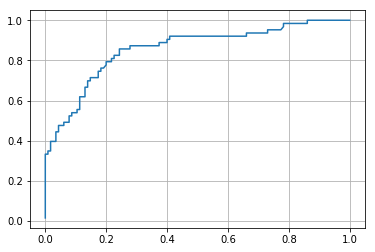

In [43]:
soft = classifier.predict_proba(Xtest)[:,1]
(fpr,tpr,thres)=roc_curve(ytest,soft)
plt.plot( fpr , tpr )
plt.grid()
thres

In [44]:
re=roc_auc_score(ytest,soft) # Compute AUC here
re

0.8561766735679779

Good Job ! :-)